# Visualizing World Cup Data With Seaborn

For this project you will be exploring data from the Fifa World Cup from 1930-2014 to analyze trends and discover insights about the world’s game, fútbol!

This Fifa World Cup data is from Kaggle. Kaggle is a platform for data science competitions that hosts many datasets online.

Using Seaborn you will create a series of plots that explore aggregates and distribution across the goals scored in World Cup games.

### A note on datasets
You may notice some typographical errors in the data as you view it. This is a large dataset, and errors are often a part of the process of generating large datasets. None of the errors should affect any of the steps of this project.

## Visualize

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Part I - World Cup Matches

In [67]:
df = pd.read_csv('WorldCupMatches.csv')
df.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    int64  
 7   Away Team Goals       852 non-null    int64  
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    int64  
 12  Half-time Away Goals  852 non-null    int64  
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2           8

In [69]:
# check isnull
df.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [70]:
# fill isnull with mean()
df = df.fillna(df['Attendance'].mean())

In [71]:
df.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [72]:
# new column for Total Goals
df['Total Goals'] = df['Home Team Goals'] + df['Away Team Goals']
df.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3


### Bar Chart for Average Number of Goal in World Cup Matches 

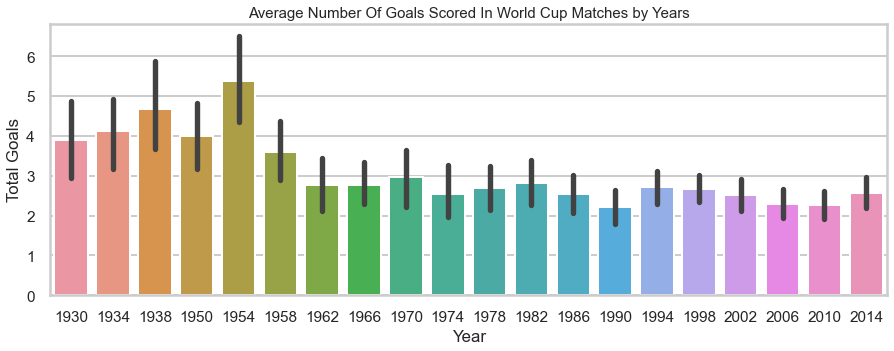

In [82]:
# Bar chart

sns.set_style('whitegrid')
sns.set_context('poster', font_scale=0.7)
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(data=df, x='Year', y='Total Goals')
ax.set_title('Average Number Of Goals Scored In World Cup Matches by Years', fontsize=15)
plt.show()

### Part II - Goals

In [55]:
df_goals = pd.read_csv('goals.csv')
df_goals.head(2)

,goals,home/away,year
0,4,home,1930
1,3,home,1930


In [56]:
df_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   goals      852 non-null    int64 
 1   home/away  852 non-null    object
 2   year       852 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.1+ KB


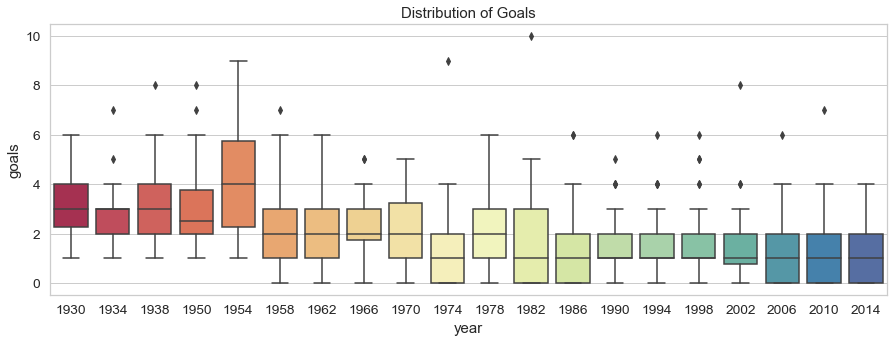

In [84]:
# Boxplot

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.25)
fig, ax2 = plt.subplots(figsize=(15,5))
ax2 = sns.boxplot(data=df_goals, x='year', y='goals', palette='Spectral')
ax2.set_title('Distribution of Goals')
plt.show()